# K Means Clustering

### Importing the necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from copy import deepcopy
import random

### Creating the KMeans Class and Functions

In [2]:
class KMeans():
    def fit(self,data,n_clusters=2):
        """
        Creates a model to cluster new data based on the K Means algorithm
        data = training set
        n_clusters = number of clusters to divide the data into
        """
        cont=0;
        maximum=[] # Maximum coordinates in every axis
        minimum=[] # Minimum coordinates in every axis
        for i in range(len(data[1])):
            maximum.append(max(data[:,i]))
            minimum.append(min(data[:,i]))
        cluster_coords=[[]]
        for _ in range(n_clusters): # Generate random coordinates for each cluster
            coord = []
            for i in range(len(data[1])):
                coord.append(random.uniform(minimum[i],maximum[i])) # Initialize the cluster randomly between min and max
            cluster_coords.append(coord)
        cluster_coords.pop(0)
        cluster_coords=deepcopy(cluster_coords)
        leave=True
        while leave:
            cluster_relation=self.cluster_rel(data,cluster_coords) # Finds the closest cluster to every point
            new_position=np.empty((n_clusters,data.shape[1])) # Initialize a matrix to update cluster positions
            for i in range(cluster_relation.shape[1]):
                assigned_position=[[]]
                for ii in range(cluster_relation.shape[0]):
                    if cluster_relation[ii,i] == 1:
                        assigned_position.append(data[ii]) # Separate all points with the same assigned cluster
                assigned_position.pop(0)
                assigned_position = np.asarray(assigned_position)
                avg_position=[]
                if(assigned_position.any()):
                    for ii in range(assigned_position.shape[1]):
                        avg_position.append(sum(assigned_position[:,ii])/len(assigned_position[:,ii]))
                    new_position[i,0:assigned_position.shape[1]]=avg_position # New position is the average of all points assigned to that cluster
                else:
                    new_position[i,0:len(cluster_coords[i])]=cluster_coords[i] # If no points were assigned, keep the same position
            moved=0
            for i in range(len(new_position)):
                moved+=np.linalg.norm(new_position[i]-cluster_coords[i])
            if(moved<=np.linalg.norm(np.asarray(maximum)-np.asarray(minimum))/100):
                leave=False # Leave if the difference in the updated position is less than 1% of the range of the points
            else:
                cluster_coords=new_position # Else, continue with the same position
            cont += 1
        self.cluster_coords = cluster_coords
    
    def predict(self,x,visualization = False):
        """
        Groups data into n_clusters groups based on the K Means algorithm, returning the group for each entry.
        x = values to find cluster
        visualization = plot the results
        """
        classif = self.cluster_rel(x,self.cluster_coords)
        ans=[] # Final cluster assigned to each point
        for i in range(len(classif)):
            for ii in range(len(classif[i])):
                if classif[i][ii] == 1:
                    ans.append(ii+1) # Append the cluster for every point
                    break
        if(visualization):
            colors = ['b','g','r','c','m','y','k','w']
            for i in range(len(x)):
                plt.scatter(x[i,0],x[i,1],c=colors[ans[i]-1], marker = '.',s=70)
            for i in range(len(self.cluster_coords)):
                plt.scatter(self.cluster_coords[i,0],self.cluster_coords[i,1],c=colors[i],marker='*',s=120)
            plt.grid()
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('K Means Clustering')
            plt.show()
        return ans
        
    def cluster_rel(self,X,cluster_coords):
        """
        Find the closest cluster to every point (called by fit and predict)
        """
        distances=[]
        for i in X:
            interm_dist=[]
            for ii in cluster_coords:
                interm_dist.append(np.linalg.norm(i-ii)) # Calculates the distance from every cluster to every point
            distances.append(interm_dist)

        cluster_relation = deepcopy(distances)
        for i in range(len(cluster_relation)):
            relation =[]
            for ii in range(len(cluster_relation[i])):
                if cluster_relation[i][ii] == min(cluster_relation[i]):
                    relation.append(1) # Append 1 if this is the closest cluster to the point
                else:
                    relation.append(0) # Append 0 otherwise
            cluster_relation[i]=relation

        cluster_relation=np.asarray(cluster_relation)
        return cluster_relation # Returns the OneHotEncoded cluster matrix

### Creating a Training Set

In [3]:
data = np.array([[1,2],
               [1.5,1.8],
               [5,8],
               [8,8],
               [1,0.6],
               [9,11],
               [4,6],
               [5,4],
               [3,6],])

### Applying Clustering Algorithm

In [4]:
# Creating an instance of the KMeans class
model = KMeans()

In [5]:
# Fitting the model to the training data
model.fit(data,n_clusters=3)

In [6]:
# Finding the coordinates of each cluster
model.cluster_coords

array([[7.33333333, 9.        ],
       [4.        , 5.33333333],
       [1.16666667, 1.46666667]])

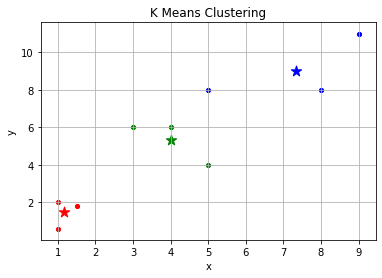

[3, 3, 1, 1, 3, 1, 2, 2, 2]

In [7]:
model.predict(data,visualization = True)

### Predicting a random new point based on the same Training set

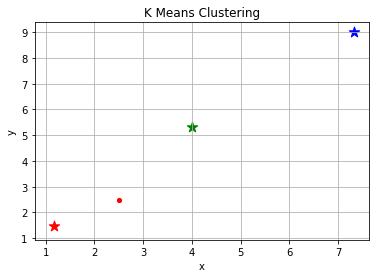

[3]

In [8]:
point = np.array([[2.5,2.5]])
model.predict(point,visualization = True)